In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.shape

(48895, 16)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


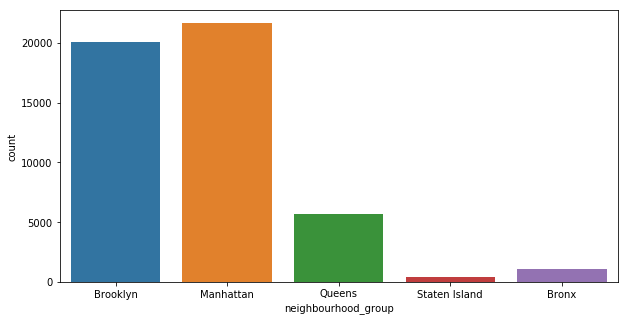

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['neighbourhood_group'])

In [8]:
df.fillna('last_review',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null object
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64


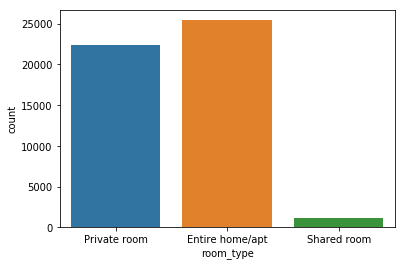

In [10]:
sns.countplot(df['room_type'])

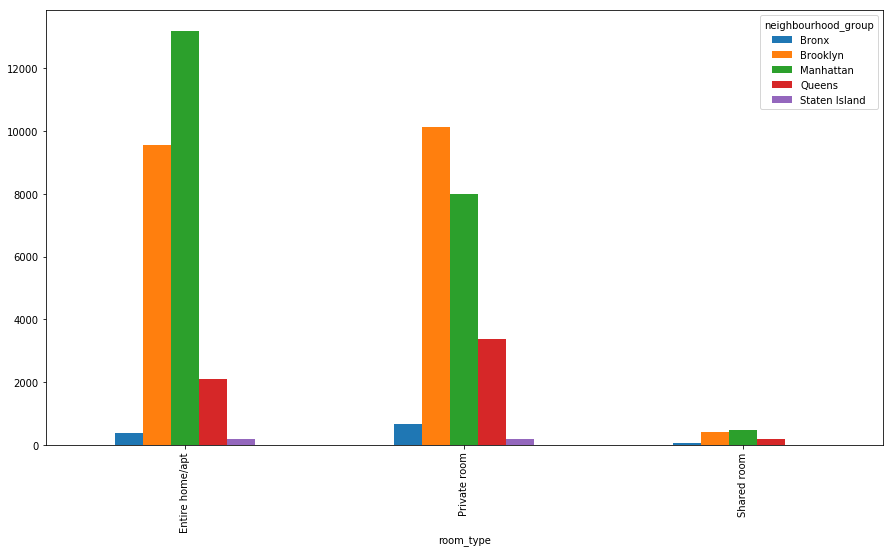

In [11]:
pd.crosstab(df['room_type'],df['neighbourhood_group']).plot.bar(figsize=(15,8))

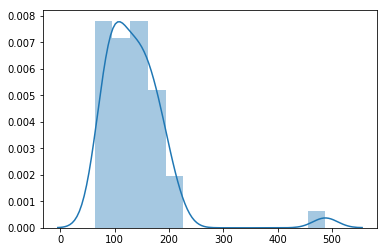

In [12]:
brooynl = df[df['neighbourhood_group']=="Brooklyn"][['neighbourhood','price']].groupby(['neighbourhood']).mean()
sns.distplot(brooynl)

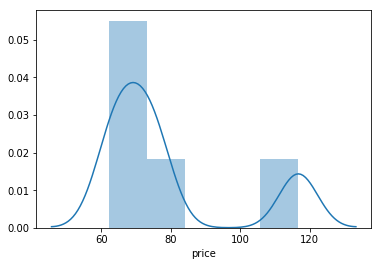

In [13]:
private_room_price = df[df.room_type=="Private room"][['neighbourhood_group','price']].groupby('neighbourhood_group')['price'].mean()
sns.distplot(private_room_price)

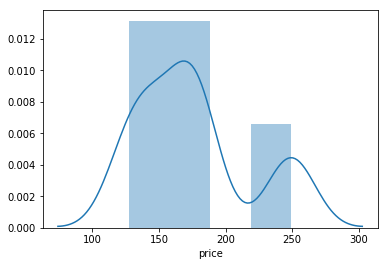

In [14]:
Entireapt = df[df.room_type=="Entire home/apt"][['neighbourhood_group','price']].groupby('neighbourhood_group')['price'].mean()
sns.distplot(Entireapt)

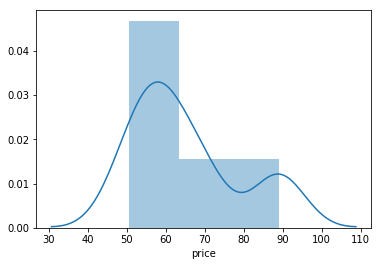

In [15]:
shared_room = df[df.room_type=="Shared room"][['neighbourhood_group','price']].groupby('neighbourhood_group')['price'].mean()
sns.distplot(shared_room)

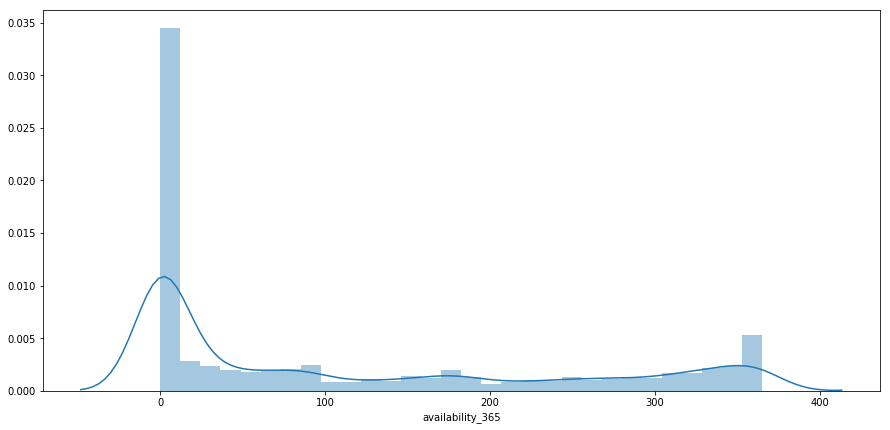

In [16]:
plt.figure(figsize=(15,7))
sns.distplot(df['availability_365'])

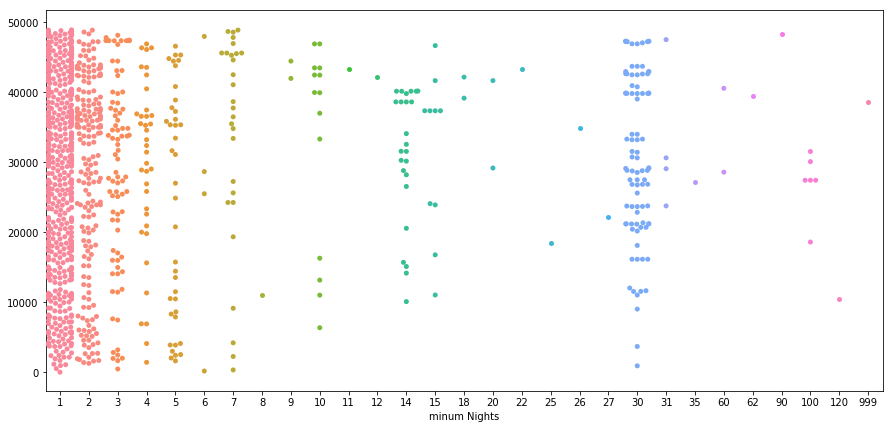

In [17]:
shared_mimum_night = df[df.room_type=="Shared room"]['minimum_nights']
plt.figure(figsize=(15,7))
plt.xlabel("minum Nights")
sns.swarmplot(y= shared_mimum_night.index,x= shared_mimum_night.values)

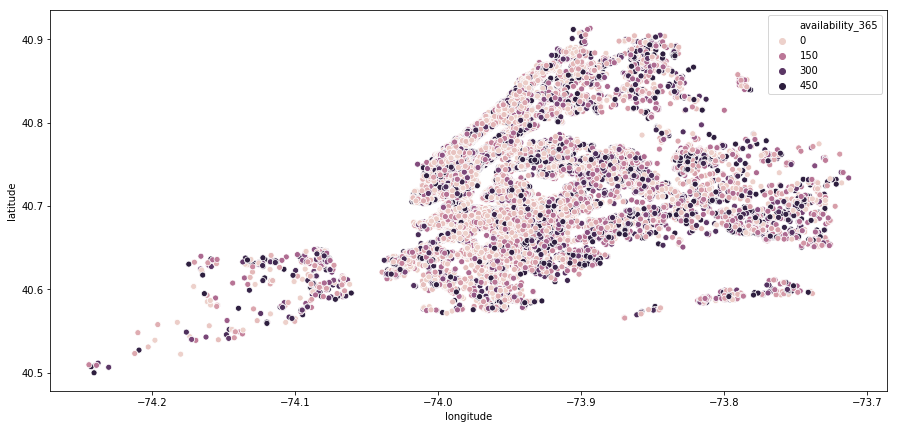

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365)

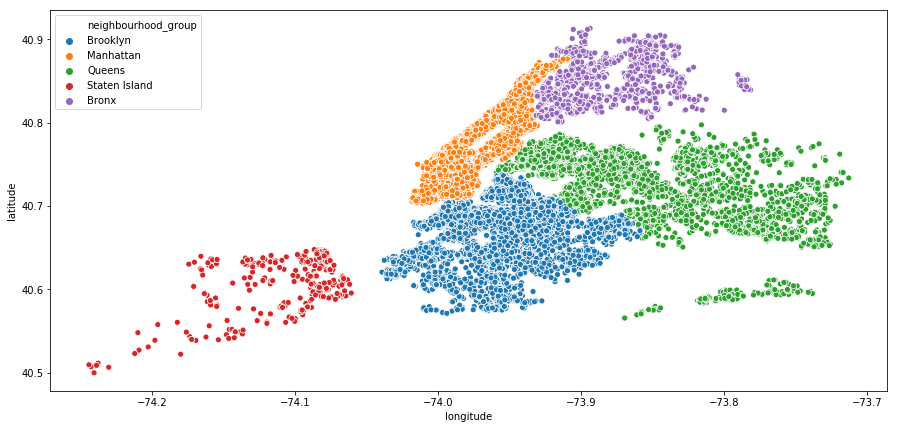

In [19]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group)

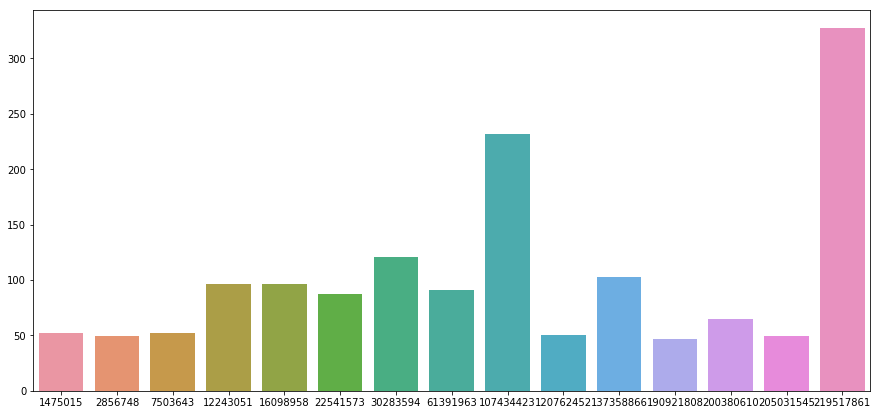

In [20]:
most_popular = (df.host_id.value_counts()[:15])
plt.figure(figsize=(15,7))
sns.barplot(y=most_popular.values,x=most_popular.index)

In [21]:
enc = LabelEncoder()
df['name'] = enc.fit_transform(df['name'])
df['neighbourhood'] = enc.fit_transform(df['neighbourhood'])
df['neighbourhood_group'] = enc.fit_transform(df['neighbourhood_group'])
df['room_type'] = enc.fit_transform(df['room_type'])

In [22]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,12328,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,37455,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355
2,3647,43543,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,last_review,last_review,1,365
3,3831,14783,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194
4,5022,18693,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.1,1,0


In [23]:
x = df.drop(['price','host_name','latitude','longitude','number_of_reviews','last_review','reviews_per_month'],axis=1)
y = df['price']
# standScalar = StandardScaler()
# x = standScalar.fit_transform(x)
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [24]:
reg=DecisionTreeClassifier()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score,accuracy_score
accuracy_score(y_test,y_pred)

0.06993865030674846

In [25]:
reg=ExtraTreesClassifier()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0820040899795501

In [26]:
reg=NearestNeighbors()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score,accuracy_score
accuracy_score(y_test,y_pred)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'